In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jrnai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
thaiVilla = pd.read_excel('ElVezReview.xlsx').drop(columns = ['Unnamed: 0'])
thaiVilla['Date'] = pd.to_datetime(thaiVilla['Date'])

In [3]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date
0,289,Shivina K.,5,We live near this place in FiDi and have been ...,68,111,2021-10-14
1,14,Joe O.,2,Took us a very long while to get served. Furth...,54,74,2021-10-03
2,1,Shawn L.,2,Let's start with that a few years ago there we...,78,38,2021-10-02
3,426,Susan Y.,5,"First off, this restaurant is HUGE! I would sa...",39,140,2021-08-24
4,20,Grace A.,5,"Great service, excellent food...can't say enou...",100,180,2021-09-05
...,...,...,...,...,...,...,...
699,0,Celia Z.,5,First time for 5 persons of diverse tastes. G...,7,0,2014-06-26
700,0,Priya A.,2,I decided to try this place after my friend ra...,28,0,2014-05-29
701,0,Gino P.,2,Came in on a Saturday afternoon around 3 and s...,7,0,2016-04-22
702,3,annabelle l.,2,terrible sevice! food was passable. we waited ...,7,2,2015-06-29


In [4]:
thaiMenu = {'Chips & Salsa',
 'Classic Guacamole',
 'Tito Santana Guacamole',
 'Nacho Mama',
 'Macho Nacho',
 'Queso Fundido con Carne',
 'Queso Fundido con Hongos',
 'Tortilla Soup',
 'Chopped Salad',
 'Kale Salad',
 "Tijuana's Original Caesar",
 'Vuelva a la Vida',
 'Mezcal Cured Salmon',
 'Snapper Aguachile',
 'Tuna Tostadas',
 'Crab Tostadas',
 'Zucchini Blossom & Corn Quesadillas',
 'Chicken Quesadillas',
 'Huitlacoche Quesadillas',
 'Black Bean Tlayuda',
 'Milanesa',
 'Burger',
 'Chicken Enchiladas',
 'Black Bean Enchiladas',
 'Oxtail Enchiladas',
 'Crab Enchiladas',
 'Chipotle Chicken Burrito',
 'Beef Burrito',
 'Achiote Grilled Chicken',
 'Grilled Skirt Steak',
 'Grilled Shrimp',
 'Grilled Lamb Tenderloin & Merguez Sausage',
 'Combination of Two',
 'Combination of Three',
 'Crispy Mahi Mahi Tacos',
 'Lamb "Arabes" Tacos',
 'Carnitas Tacos',
 'Chicken Tacos',
 'Cauliflower Tacos',
 'Tacos Al Pastor',
 'Steak Tacos',
 'Grilled Fish Tacos',
 'Shrimp Tacos',
 'Grilled Corn on the Cob',
 'Watermelon & Cucumber Salad',
 'Green Beans',
 'Refried Black Beans',
 'Black Beans & Rice',
 'Plantains con Queso',
 'Functional and analytics cookies',
 'Targeting cookies'}

# Distribution of the Friends Feature

In [5]:
friends = thaiVilla['Friends']

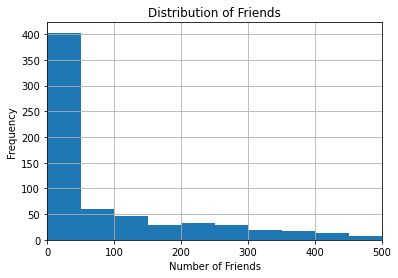

In [6]:
friends.hist(bins = 100)
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 500)
plt.title('Distribution of Friends')
#plt.figure(figsize=(20,20))
plt.show()

In [7]:
friends.describe()

count     704.000000
mean      160.811080
std       410.484569
min         0.000000
25%         1.000000
50%        28.500000
75%       175.250000
max      5000.000000
Name: Friends, dtype: float64

# Distribution of the Ratings Feature

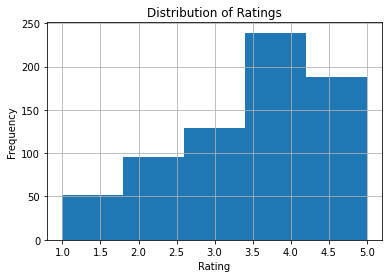

In [8]:
Ratings = thaiVilla['Rating']
Ratings.hist(bins = 5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.xlim(xmin=0, xmax = 150)
plt.title('Distribution of Ratings')
#plt.figure(figsize=(20,20))
plt.show()

In [9]:
Ratings.describe()

count    704.000000
mean       3.589489
std        1.222340
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

# Distribution of the UserReviews Feature

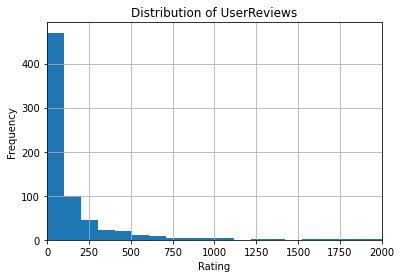

In [10]:
UserReviews = thaiVilla['UserReviews']
UserReviews.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 2000)
plt.title('Distribution of UserReviews')
#plt.figure(figsize=(20,20))
plt.show()

In [11]:
UserReviews.describe()

count     704.000000
mean      165.748580
std       397.077192
min         1.000000
25%        14.000000
50%        42.000000
75%       156.250000
max      5078.000000
Name: UserReviews, dtype: float64

# Distribution of the Photos Feature

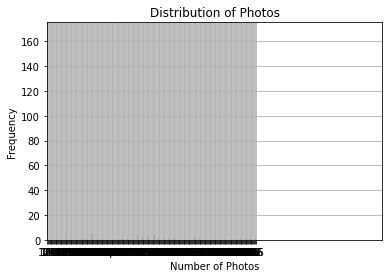

In [12]:
Photos = thaiVilla['Photos']
Photos.hist(bins = 1000)
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Photos')
#plt.figure(figsize=(20,20))
plt.show()

In [13]:
Photos.describe()

count     704
unique    250
top         0
freq      167
Name: Photos, dtype: object

# Time Series of Ratings vs Time

In [14]:
import datetime
import random
import matplotlib.pyplot as plt

In [15]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [16]:
sortedDf = pd.DataFrame(sortedDf.groupby("Date")["Rating"].mean())

In [17]:
x = sortedDf.index
y = sortedDf['Rating']

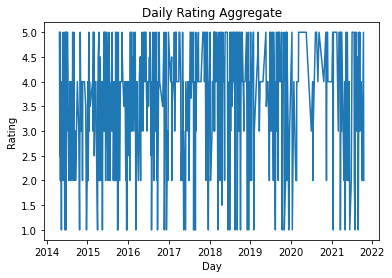

<Figure size 3600x1080 with 0 Axes>

In [18]:
plt.plot(x,y)
plt.title('Daily Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Day')
plt.figure(figsize=(50,15))
plt.show()

In [19]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [20]:
monthlyRating = pd.DataFrame(sortedDf.groupby([sortedDf['Date'].dt.year.rename('year'), sortedDf['Date'].dt.month_name().rename('month')])['Rating'].mean().reset_index())

In [21]:
monthlyRating['my'] = monthlyRating['year'].astype(str) + ' ' + monthlyRating['month'].astype(str)

In [22]:
monthlyRating

,year,month,Rating,my
0,2014,April,3.400000,2014 April
1,2014,August,3.555556,2014 August
2,2014,December,2.833333,2014 December
3,2014,July,3.428571,2014 July
4,2014,June,3.846154,2014 June
...,...,...,...,...
83,2021,June,2.250000,2021 June
84,2021,March,3.777778,2021 March
85,2021,May,3.166667,2021 May
86,2021,October,2.600000,2021 October


In [23]:
x = monthlyRating['my']
y = monthlyRating['Rating']

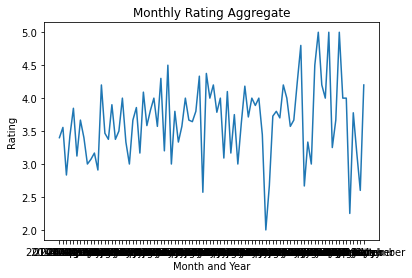

<Figure size 3600x1080 with 0 Axes>

In [24]:
plt.plot(x,y)
plt.title('Monthly Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Month and Year')
plt.figure(figsize=(50,15))
plt.show()

# Food Occurences in Menu

In [25]:
lst = []
for i, row in thaiVilla.iterrows():
    count = 0
    s = row.Review.lower().replace(' ', '')
    for i in thaiMenu:
        i = i.lower()
        if i.replace(' ', '') in s:
            count += 1
    lst.append(count)
    
#     print(i, row)
#     count = 0
#     s = row.Review.lower()
#     s = s.plit()
#     seven = s[:7]
#     six = s[:6]
#     five = s[:5]
#     four = s[:4]
#     three = s[:3]
#     two = s[:2]
#     for j in s:
#         if j in thaiMenu:
#             count += 1
#     for j in s:
#         if seven in s or sixe.....:
#             count += 1
#         seven = seven[1:] + [j]
#         ...
#     lst.append(count)
#     break

In [26]:
thaiVilla['Food Occurs'] = lst

# Catching Sentiment in Reviews

In [27]:
positive = {'best', 'amazing', 'love', 'good', 'perfect', 'fantastic', 'beautiful', 'yummy', 'delicious'}
negative = {'horrible', 'bad', 'gross', 'hate', 'disgusting', 'dread', 'terrible'}

In [28]:
plst = []
nlst = []
for i, row in thaiVilla.iterrows():
    gcount = 0
    ncount = 0
    s = row.Review.lower().replace(' ', '')
    for i in positive:
        if i in s:
            gcount += 1
    for i in negative:
        if i in s:
            ncount += 1     
    plst.append(gcount)
    nlst.append(ncount)

In [29]:
thaiVilla['Positive Occurs'] = plst
thaiVilla['Negative Occurs'] = nlst

In [30]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date,Food Occurs,Positive Occurs,Negative Occurs
0,289,Shivina K.,5,We live near this place in FiDi and have been ...,68,111,2021-10-14,0,2,0
1,14,Joe O.,2,Took us a very long while to get served. Furth...,54,74,2021-10-03,1,0,0
2,1,Shawn L.,2,Let's start with that a few years ago there we...,78,38,2021-10-02,1,1,0
3,426,Susan Y.,5,"First off, this restaurant is HUGE! I would sa...",39,140,2021-08-24,1,3,0
4,20,Grace A.,5,"Great service, excellent food...can't say enou...",100,180,2021-09-05,0,0,0
...,...,...,...,...,...,...,...,...,...,...
699,0,Celia Z.,5,First time for 5 persons of diverse tastes. G...,7,0,2014-06-26,2,1,0
700,0,Priya A.,2,I decided to try this place after my friend ra...,28,0,2014-05-29,0,1,0
701,0,Gino P.,2,Came in on a Saturday afternoon around 3 and s...,7,0,2016-04-22,0,1,0
702,3,annabelle l.,2,terrible sevice! food was passable. we waited ...,7,2,2015-06-29,0,0,1


# Correlation Heatmap

<AxesSubplot:>

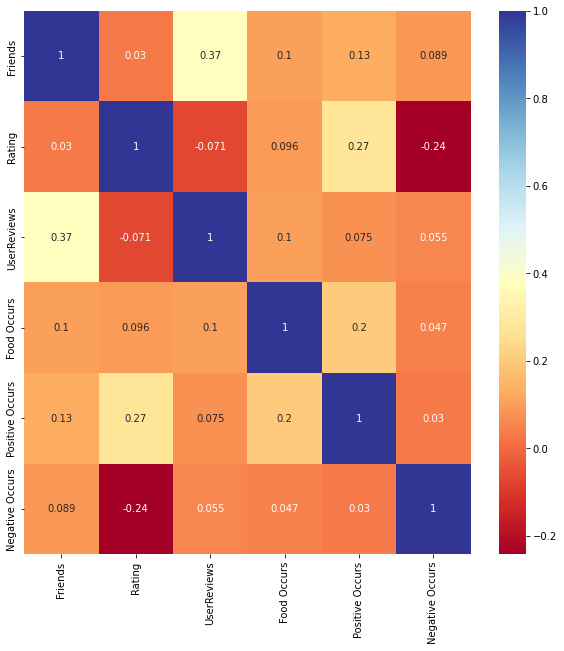

In [31]:
correlation = thaiVilla[['Friends', 'Rating', 'UserReviews', 'Photos', 'Food Occurs', 'Positive Occurs', 'Negative Occurs']]

corr = correlation.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

# Positive Sentiment Analysis

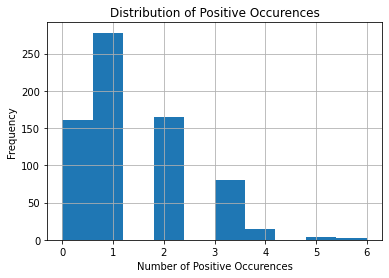

In [32]:
posOcc = thaiVilla['Positive Occurs']
posOcc.hist(bins = 10)
plt.xlabel('Number of Positive Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Positive Occurences')
#plt.figure(figsize=(20,20))
plt.show()

# Negative Sentiment Analysis

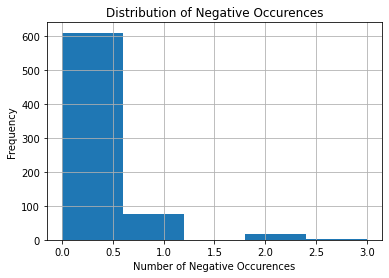

In [33]:
negOcc = thaiVilla['Negative Occurs']
negOcc.hist(bins = 5)
plt.xlabel('Number of Negative Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Negative Occurences')
#plt.figure(figsize=(20,20))
plt.show()

In [34]:
score_df = pd.DataFrame(columns = ['Menu Item', 'Positive', 'Negative', 'Neutral', 'Score'])

for item in thaiMenu:
    item = item.lower()
    pos = 0
    neg = 0
    neu = 0
    rating = 0
    for review in thaiVilla['Review']:
        review = review.lower()
        sentences_with_item = []
        sents = nltk.tokenize.sent_tokenize(review)
        for sent in sents:
           if sent.find(item) != -1:
                sentences_with_item.append(sent)
        for sent in sentences_with_item:
           # print(sent)
            score = sid.polarity_scores(sent)
            #print(score)
            rating += score['compound']
            if score['compound'] > 0:
                pos += 1
            elif score['compound'] < 0:
                neg += 1
            else:
                neu += 1
    total_mentions = pos + neg + neu
    if total_mentions > 10:
        #pct_pos = pos / total_mentions
        avg = rating / total_mentions

        score_df = score_df.append({'Menu Item' : item, 'Positive' : pos, 'Negative' : neg, 'Neutral' : neu, 'Score': avg},
                ignore_index = True)
score_df = score_df.sort_values(by=['Score'])
print('WORST')
for index, row in score_df.head(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
print()
print('BEST')
for index, row in score_df.tail(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
    # print(item)
    # print('pos: ' + str(pos))
    # print('neg ' + str(neg))
    # print()
score_df







WORST
chicken tacos: 0.7333333333333333
chicken enchiladas: 0.8333333333333334
tortilla soup: 0.8571428571428571

BEST
steak tacos: 0.926829268292683
shrimp tacos: 0.9285714285714286
grilled fish tacos: 0.9375


,Menu Item,Positive,Negative,Score
2,chicken tacos,11,4,0.733333
4,chicken enchiladas,10,2,0.833333
5,tortilla soup,12,2,0.857143
0,macho nacho,11,1,0.916667
3,cauliflower tacos,11,1,0.916667
1,nacho mama,36,3,0.923077
6,carnitas tacos,12,1,0.923077
7,steak tacos,38,3,0.926829
8,shrimp tacos,26,2,0.928571
9,grilled fish tacos,15,1,0.937500
